In [1]:
from scipy import fftpack
from scipy import signal
import scipy.io.wavfile
from scipy import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0.5, 0, 'Time (s)')

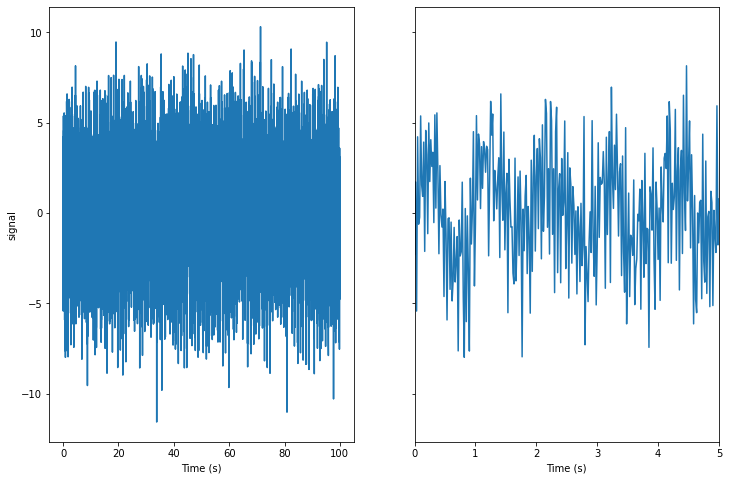

In [2]:
def signal_samples(t):
#simulated signal with pure sinusoidal components at 1 Hz and at 22 Hz, on top of a normal-distributed noise floor.
    return (2*np.sin(2*np.pi*t) + 3*np.sin(2*22*np.pi*t) + 2.0*np.random.randn(*np.shape(t)))

B = 30.0 #Maximum frequency that fed to the signal
f_s = 2*B #Sampling frequency
delta_f = 0.01 #Resolution of frequency spectrum
N = int(f_s/delta_f) #Number of samples
T = N/f_s #Sampling period

t = np.linspace(0,T,N) #Array of sample times
f_t = signal_samples(t) #Signal values

#Plotting the sampled signl
fig, axes = plt.subplots(1, 2, figsize = (12,8), sharey=True)
#Plot 1 shows the full 100seconds
axes[0].plot(t, f_t)
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("signal")
#Plot 2 zooms in on the first 5 seconds
axes[1].plot(t, f_t)
axes[1].set_xlim(0, 5)
axes[1].set_xlabel("Time (s)")

Text(0, 0.5, '$|F|/N$')

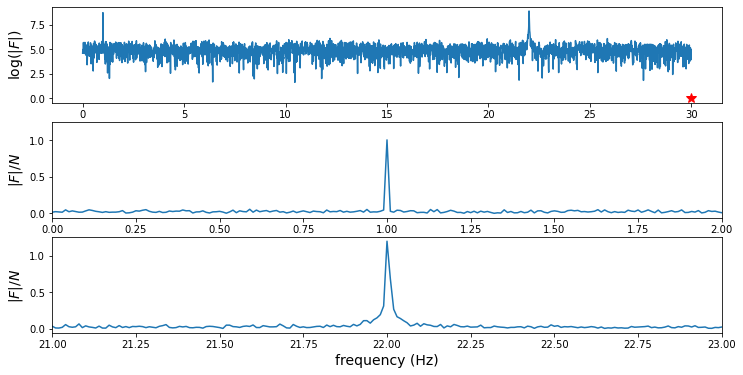

In [3]:
#Use the FFT to obtain the frequncy domain representation of the above signal
F = fftpack.fft(f_t)

#The FFT reads in only the y-axis data. Assigning frequencies to the x-axis has to be done manually
f = fftpack.fftfreq(N, 1.0/f_s) #contains the frequencies corresponding to each frequency bin.
mask = np.where(f >= 0) #Extracts the frequencies of interest

#Plotting the data
fig, axes = plt.subplots(3, 1, figsize=(12,6))
axes[0].plot(f[mask], np.log(abs(F[mask])), label="real")
axes[0].plot(B, 0, 'r*', markersize=10)
axes[0].set_ylabel("$\log(|F|)$", fontsize=14)
axes[1].plot(f[mask], abs(F[mask])/N, label="real")
axes[1].set_xlim(0, 2)
axes[1].set_ylabel("$|F|/N$", fontsize=14)
axes[2].plot(f[mask], abs(F[mask])/N, label="real")
axes[2].set_xlim(21, 23)
axes[2].set_xlabel("frequency (Hz)", fontsize=14)
axes[2].set_ylabel("$|F|/N$", fontsize=14)

In [ ]:
#Code to compute time domain representation from a filtered frequency domain reperesentation
F_filtered = F*(abs(f) < 2) #Low pass filter to remove frequencies above 2Hz
f_t_filtered = fftpack.ifft(F_filtered)
#Plot the original signal plus the filtered signal
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(t, f_t, label="original")
ax.plot(t, f_t_filtered.real, color="red", lw=3, label="filtered")
ax.set_xlim(0, 10)
ax.set_xlabel("time (s)")
ax.set_ylabel("signal")
ax.legend()